<a href="https://colab.research.google.com/github/mvgarc/Metodos_Postgrado/blob/main/Clase_Postgrado_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**¿Qué es el Modelo de Regresión Lineal Múltiple?**
El Modelo de Regresión Lineal Múltiple es una extensión de la regresión lineal simple. Mientras que la regresión lineal simple utiliza una única variable independiente (o predictor) para predecir una variable dependiente, la regresión lineal múltiple utiliza dos o más variables independientes para predecir el valor de una única variable dependiente.

El objetivo principal es encontrar la mejor relación lineal entre las variables independientes y la variable dependiente. Esto nos permite:

1. Predecir: Estimar el valor de la variable dependiente para nuevas observaciones, basándose en los valores de las variables independientes.
2. Explicar: Entender cómo cada variable independiente contribuye a la variación de la variable dependiente y cuál es la fuerza y dirección de esa relación.

In [7]:
import pandas as pd
import numpy as np

In [5]:
data = {
    'x1': [2, 8, 11, 10, 8, 4, 2, 2, 9, 8, 4, 11, 12, 2, 4, 4, 20, 1, 10, 15, 15, 16, 17, 6, 5],
    'x2': [50, 110, 120, 550, 295, 200, 375, 52, 100, 300, 412, 400, 500, 360, 205, 400, 600, 585, 540, 250, 290, 510, 590, 100, 400],
    'y':  [9.95, 24.45, 31.75, 35, 25.02, 16.86, 14.38, 9.6, 24.35, 27.5, 17.08, 37, 41.95, 11.66, 21.65, 17.89, 69, 10.3, 34.93, 46.59, 44.88, 54.12, 56.63, 22.13, 21.15]
}

df = pd.DataFrame(data)
print (df)

    x1   x2      y
0    2   50   9.95
1    8  110  24.45
2   11  120  31.75
3   10  550  35.00
4    8  295  25.02
5    4  200  16.86
6    2  375  14.38
7    2   52   9.60
8    9  100  24.35
9    8  300  27.50
10   4  412  17.08
11  11  400  37.00
12  12  500  41.95
13   2  360  11.66
14   4  205  21.65
15   4  400  17.89
16  20  600  69.00
17   1  585  10.30
18  10  540  34.93
19  15  250  46.59
20  15  290  44.88
21  16  510  54.12
22  17  590  56.63
23   6  100  22.13
24   5  400  21.15


In [11]:
df['Intercepto'] = 1

print("Primeras filas de tu DataFrame con la columna de Intercepto:")
print(df.head())
print("\n")

# Extraer la matriz X (variables independientes) y el vector Y (variable dependiente)
#OJO: que el orden de las columnas en X sea (Intercepto, x1, x2) para que coincida con los coeficientes.
X = df[['Intercepto', 'x1', 'x2']].values # .values convierte el DataFrame en un array de NumPy
Y = df['y'].values.reshape(-1, 1)        # .reshape(-1, 1) asegura que Y sea un vector columna

#Realizar las operaciones matriciales con NumPy, tal como en la fórmula de Excel:
#    a) Calcular la transpuesta de X (X^T)
X_transpuesta = X.T

#    b) Multiplicar X_transpuesta por X (X^T X)
XTX = np.dot(X_transpuesta, X)

#    c) Calcular la inversa de (X^T X) ((X^T X)^-1)
XTX_inversa = np.linalg.inv(XTX)

#    d) Multiplicar X_transpuesta por Y (X^T Y)
XTY = np.dot(X_transpuesta, Y)

#    e) Finalmente, multiplicar ((X^T X)^-1) por (X^T Y) para obtener los coeficientes beta
coeficientes_beta = np.dot(XTX_inversa, XTY)

print("Coeficientes Beta (Intercepto, x1, x2) usando NumPy:")
print(coeficientes_beta)

Primeras filas de tu DataFrame con la columna de Intercepto:
   x1   x2      y  Intercepto
0   2   50   9.95           1
1   8  110  24.45           1
2  11  120  31.75           1
3  10  550  35.00           1
4   8  295  25.02           1


Coeficientes Beta (Intercepto, x1, x2) usando NumPy:
[[2.26379143]
 [2.74426964]
 [0.01252781]]


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression # Importamos el modelo de Regresión Lineal

data = {
    'x1': [2, 8, 11, 10, 8, 4, 2, 2, 9, 8, 4, 11, 12, 2, 4, 4, 20, 1, 10, 15, 15, 16, 17, 6, 5],
    'x2': [50, 110, 120, 550, 295, 200, 375, 52, 100, 300, 412, 400, 500, 360, 205, 400, 600, 585, 540, 250, 290, 510, 590, 100, 400],
    'y':  [9.95, 24.45, 31.75, 35, 25.02, 16.86, 14.38, 9.6, 24.35, 27.5, 17.08, 37, 41.95, 11.66, 21.65, 17.89, 69, 10.3, 34.93, 46.59, 44.88, 54.12, 56.63, 22.13, 21.15]
}

df = pd.DataFrame(data)

# Definir las características (X) y el objetivo (y)
#    Si quieres que scikit-learn calcule el intercepto automáticamente, NO incluyas una columna de '1's en X.
#    Por defecto, LinearRegression ya asume que quieres un intercepto (fit_intercept=True).
X = df[['x1', 'x2']] # Solo las variables predictoras
y = df['y']

# Crear el modelo de regresión lineal
model = LinearRegression() # Por defecto, fit_intercept=True, así que calcula el intercepto

# Ajustar el modelo de los datos
model.fit(X, y)

print("Coeficientes Beta (x1, x2):")
print(model.coef_)
print("Intercepto:")
print(model.intercept_)

# Para verlos con sus nombres:
print("\nCoeficientes Beta (nombrados):")
print(f"Intercepto: {model.intercept_}")
print(f"x1 (Wire Length): {model.coef_[0]}")
print(f"x2 (Die Height): {model.coef_[1]}")

Coeficientes Beta (x1, x2):
[2.74426964 0.01252781]
Intercepto:
2.2637914344045704

Coeficientes Beta (nombrados):
Intercepto: 2.2637914344045704
x1 (Wire Length): 2.744269643241186
x2 (Die Height): 0.012527811385604203


In [10]:
import pandas as pd
import statsmodels.api as sm

data = {
    'x1': [2, 8, 11, 10, 8, 4, 2, 2, 9, 8, 4, 11, 12, 2, 4, 4, 20, 1, 10, 15, 15, 16, 17, 6, 5],
    'x2': [50, 110, 120, 550, 295, 200, 375, 52, 100, 300, 412, 400, 500, 360, 205, 400, 600, 585, 540, 250, 290, 510, 590, 100, 400],
    'y':  [9.95, 24.45, 31.75, 35, 25.02, 16.86, 14.38, 9.6, 24.35, 27.5, 17.08, 37, 41.95, 11.66, 21.65, 17.89, 69, 10.3, 34.93, 46.59, 44.88, 54.12, 56.63, 22.13, 21.15]
}

# Crear un DataFrame de Pandas
df = pd.DataFrame(data)

# Definir la variable dependiente (y)
y = df['y']

# Definir las variables independientes (X)
#    sm.add_constant() es la forma estándar de añadir la columna de "Intercepto"
X = sm.add_constant(df[['x1', 'x2']]) # Esto añade automáticamente una columna llamada 'const' para el intercepto

# Crear y ajustar el modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X) # OLS significa Mínimos Cuadrados Ordinarios
results = model.fit()

#Imprimir el resumen completo de los resultados de la regresión
print(results.summary())

# Para obtener solo los coeficientes:
print("\nCoeficientes Beta (constante/intercepto, x1, x2) de statsmodels:")
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     572.2
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.08e-19
Time:                        22:48:27   Log-Likelihood:                -54.568
No. Observations:                  25   AIC:                             115.1
Df Residuals:                      22   BIC:                             118.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2638      1.060      2.136      0.0

Intercepto (β0): 2.2637914344045704
Coeficientes (β1, β2): [2.74426964 0.01252781]


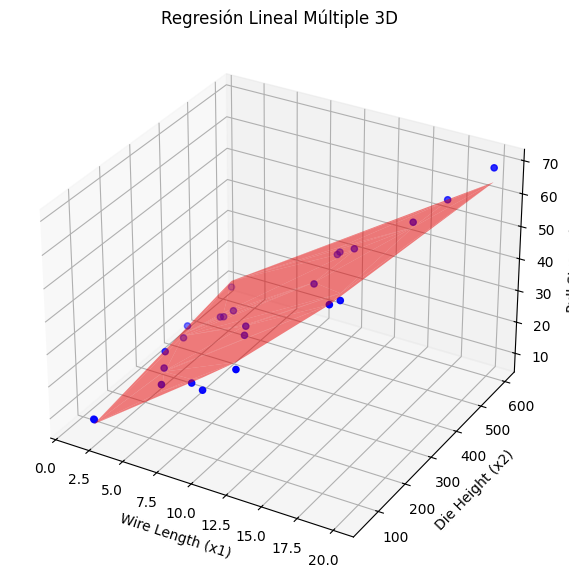

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = {
    'x1': [2, 8, 11, 10, 8, 4, 2, 2, 9, 8, 4, 11, 12, 2, 4, 4, 20, 1, 10, 15, 15, 16, 17, 6, 5],
    'x2': [50, 110, 120, 550, 295, 200, 375, 52, 100, 300, 412, 400, 500, 360, 205, 400, 600, 585, 540, 250, 290, 510, 590, 100, 400],
    'y':  [9.95, 24.45, 31.75, 35, 25.02, 16.86, 14.38, 9.6, 24.35, 27.5, 17.08, 37, 41.95, 11.66, 21.65, 17.89, 69, 10.3, 34.93, 46.59, 44.88, 54.12, 56.63, 22.13, 21.15]
}

df = pd.DataFrame(data)

# Se Separa las variables independientes (X) y dependiente (y)
X = df[['x1', 'x2']]
y = df['y']

# Creo y entreno el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Voy a mostrar resultados del modelo
print("Intercepto (β0):", model.intercept_)
print("Coeficientes (β1, β2):", model.coef_)

#Hacer predicciones
y_pred = model.predict(X)

# Visualización en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(df['x1'], df['x2'], df['y'], color='blue', label='Datos reales')

# Superficie del modelo (predicciones)
ax.plot_trisurf(df['x1'], df['x2'], y_pred, color='red', alpha=0.5)

# Etiquetas
ax.set_xlabel('Wire Length (x1)')
ax.set_ylabel('Die Height (x2)')
ax.set_zlabel('Pull Strength (y)')
plt.title('Regresión Lineal Múltiple 3D')
plt.show()


# Explicación de la Matriz Aumentada en Regresión Lineal Múltiple

La **matriz aumentada** es la tabla de datos original a la que se le agregan nuevas columnas con resultados derivados del modelo de regresión. Estas columnas adicionales nos permiten analizar qué tan bien el modelo está funcionando y dónde puede estar cometiendo errores.

Las nuevas columnas que agregamos son:

- **y_pred**: Los valores predichos por el modelo para cada observación.
- **residuo**: La diferencia entre el valor real y el valor predicho (`y - y_pred`). Indica si el modelo sobreestimó (residuo negativo) o subestimó (residuo positivo) el resultado.
- **error absoluto**: La magnitud del error sin considerar el signo. Nos dice cuánto se equivocó el modelo en cada predicción.
- **error porcentual**: El error absoluto expresado como porcentaje del valor real, lo que facilita la comparación entre observaciones con valores muy distintos.

Esta matriz aumentada es útil para:

- Visualizar y cuantificar el desempeño del modelo en cada punto.
- Identificar patrones en los errores para mejorar el modelo.
- Validar la precisión del modelo antes de usarlo para predicciones futuras.

---

In [15]:
df['y_pred'] = y_pred
df['residuo'] = df['y'] - df['y_pred']
df['error_absoluto'] = df['residuo'].abs()
df['error_porcentual'] = (df['error_absoluto'] / df['y']) * 100
# Imprimir columnas clave de la matriz resultado
print(df[['x1', 'x2', 'y', 'y_pred', 'residuo', 'error_absoluto', 'error_porcentual']])

    x1   x2      y     y_pred   residuo  error_absoluto  error_porcentual
0    2   50   9.95   8.378721  1.571279        1.571279         15.791746
1    8  110  24.45  25.596008 -1.146008        1.146008          4.687149
2   11  120  31.75  33.954095 -2.204095        2.204095          6.942031
3   10  550  35.00  36.596784 -1.596784        1.596784          4.562240
4    8  295  25.02  27.913653 -2.893653        2.893653         11.565359
5    4  200  16.86  15.746432  1.113568        1.113568          6.604791
6    2  375  14.38  12.450260  1.929740        1.929740         13.419611
7    2   52   9.60   8.403777  1.196223        1.196223         12.460657
8    9  100  24.35  28.214999 -3.864999        3.864999         15.872687
9    8  300  27.50  27.976292 -0.476292        0.476292          1.731971
10   4  412  17.08  18.402328 -1.322328        1.322328          7.741969
11  11  400  37.00  37.461882 -0.461882        0.461882          1.248330
12  12  500  41.95  41.458933  0.49106

In [16]:
# Redondear a 2 decimales y mostrar
print(df[['x1', 'x2', 'y', 'y_pred', 'residuo', 'error_absoluto', 'error_porcentual']].round(2))

    x1   x2      y  y_pred  residuo  error_absoluto  error_porcentual
0    2   50   9.95    8.38     1.57            1.57             15.79
1    8  110  24.45   25.60    -1.15            1.15              4.69
2   11  120  31.75   33.95    -2.20            2.20              6.94
3   10  550  35.00   36.60    -1.60            1.60              4.56
4    8  295  25.02   27.91    -2.89            2.89             11.57
5    4  200  16.86   15.75     1.11            1.11              6.60
6    2  375  14.38   12.45     1.93            1.93             13.42
7    2   52   9.60    8.40     1.20            1.20             12.46
8    9  100  24.35   28.21    -3.86            3.86             15.87
9    8  300  27.50   27.98    -0.48            0.48              1.73
10   4  412  17.08   18.40    -1.32            1.32              7.74
11  11  400  37.00   37.46    -0.46            0.46              1.25
12  12  500  41.95   41.46     0.49            0.49              1.17
13   2  360  11.66  